# 安庆三号机组2023年1月碳排放量

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.set_option('display.float_format', '{:.3f}'.format)

# Specify the directory containing the Excel files
directory = r'C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\重要-五电厂碳排放2023数据\神皖安庆三号机组'
file_name = "神皖安庆三号机组23年1月.xlsx"
file_path = directory + "\\"  +  file_name


In [ ]:
df = pd.read_excel(file_path,skiprows=1).iloc[::,2:]

In [ ]:
df

In [189]:
# df.iloc[::,1:].hist(bins=60, figsize=(15,9),color="red");plt.show()

In [199]:
#非停机数据
df[df["负荷"] != 0]

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量
759,2023-01-03 15:15:00,11.350,2.450,0.000,498442.500,2.030
760,2023-01-03 15:20:00,13.710,2.740,0.000,526204.200,2.400
761,2023-01-03 15:25:00,14.730,3.120,0.000,511114.400,2.650
762,2023-01-03 15:30:00,14.280,2.940,0.000,525386.000,2.570
763,2023-01-03 15:35:00,15.510,3.110,0.000,532786.200,2.760
...,...,...,...,...,...,...
8485,2023-01-30 11:05:00,140.000,0.280,0.000,569756.600,0.270
8486,2023-01-30 11:10:00,140.000,8.810,0.000,607697.400,8.910
8487,2023-01-30 11:15:00,85.000,7.500,0.000,607648.700,7.580
8488,2023-01-30 11:20:00,85.000,4.360,0.000,519617.500,3.770


In [200]:
#选择非停机数据
df_without0 = df[df["负荷"] != 0]

In [201]:
# df_without0 = df_without0.copy()  # 先创建 DataFrame 的副本
#计算5mins 间隔的 碳排放强度
df_without0["碳排放强度"] = ( (df_without0["二氧化碳"]*44/22.4*10000)/1000*df_without0["烟气流量"] ) / (1000 * df_without0["负荷"])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1250508977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without0["碳排放强度"] = ( (df_without0["二氧化碳"]*44/22.4*10000)/1000*df_without0["烟气流量"] ) / (1000 * df_without0["负荷"])


In [202]:
df_without0

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
759,2023-01-03 15:15:00,11.350,2.450,0.000,498442.500,2.030,2113.440
760,2023-01-03 15:20:00,13.710,2.740,0.000,526204.200,2.400,2065.723
761,2023-01-03 15:25:00,14.730,3.120,0.000,511114.400,2.650,2126.545
762,2023-01-03 15:30:00,14.280,2.940,0.000,525386.000,2.570,2124.723
763,2023-01-03 15:35:00,15.510,3.110,0.000,532786.200,2.760,2098.487
...,...,...,...,...,...,...,...
8485,2023-01-30 11:05:00,140.000,0.280,0.000,569756.600,0.270,22.383
8486,2023-01-30 11:10:00,140.000,8.810,0.000,607697.400,8.910,751.173
8487,2023-01-30 11:15:00,85.000,7.500,0.000,607648.700,7.580,1053.173
8488,2023-01-30 11:20:00,85.000,4.360,0.000,519617.500,3.770,523.547


In [203]:
df_without0.describe()

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
count,7693.000,7693.000,7693.000,7693.000,7693.000,7693.000
mean,160.744,9.556,0.008,466107.697,9.778,683.342
std,37.607,5.036,0.295,308639.001,7.122,496.518
min,11.350,0.190,0.000,0.000,0.000,0.000
25%,133.890,3.910,0.000,0.000,0.000,0.000
50%,159.460,12.350,0.000,616097.750,12.680,908.151
75%,164.830,12.990,0.000,654732.300,13.960,971.283
max,321.210,16.090,18.650,961794.800,24.490,2153.317


In [178]:
# df_without0.iloc[::,1:].hist(bins=60, figsize=(15,9),color="red");plt.show()

In [204]:
#convert to datetime datatype
df_without0['时间'] = pd.to_datetime(df_without0['时间'])
# set date to index
df_without0.set_index('时间', inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\3426039117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without0['时间'] = pd.to_datetime(df_without0['时间'])


In [175]:
# resample to daily data
daily_Jan = df_without0.resample('D').agg({
    '负荷': 'mean',  # 计算每日平均负荷
    '二氧化碳': 'sum',  # 计算每日二氧化碳总和
    '氧含量(%)': 'mean',  # 计算每日平均氧含量
    '烟气流量': 'mean',                          # 计算每日平均烟气流量
    '碳排放量': 'sum' ,                           # 计算每日碳排放量总和
    '碳排放强度': 'mean' 
})

In [177]:
daily_Jan

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-01-03,141.088,1018.340,0.000,649903.593,1144.490,1062.950
2023-01-04,206.726,3601.180,0.052,693832.806,4176.630,838.918
2023-01-05,230.601,3922.270,0.000,727300.096,4807.570,863.165
2023-01-06,171.071,3542.230,0.030,626377.362,3713.790,902.416
2023-01-07,164.837,3548.370,0.000,608124.562,3602.720,896.849
2023-01-08,163.192,3370.480,0.000,621374.479,3507.370,906.833
2023-01-09,161.426,3551.240,0.000,616143.488,3651.380,926.914
2023-01-10,175.213,3585.300,0.028,643471.565,3859.420,921.162
2023-01-11,171.575,3606.910,0.030,633472.445,3815.270,912.922


In [240]:
len(daily_Jan)

28

In [244]:
daily_Jan.describe()

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
count,28.000,28.000,28.000,28.000,28.000,28.000
mean,160.478,2625.499,0.007,474416.718,2686.455,697.235
std,25.846,1314.908,0.017,292817.591,1832.051,436.853
min,133.890,291.960,0.000,0.000,0.000,0.000
25%,133.890,1013.558,0.000,220690.332,858.368,382.120
50%,163.701,3530.710,0.000,632826.732,3662.660,899.632
75%,172.480,3602.612,0.000,668452.962,4019.318,955.752
max,230.601,3922.270,0.065,735290.060,4808.810,1228.858


# 安庆一号机组2023年6月碳排放量

In [296]:
file_name6 = "神皖安庆一号机组23年6月.xlsx"
file_path6 = directory + "\\"  +  file_name6
df6 = pd.read_excel(file_path6,skiprows=1).iloc[::,2:]

In [297]:
df6

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量
0,2023-06-01 00:00:00,230.080,14.270,6.470,700564.440,16.640
1,2023-06-01 00:05:00,233.060,14.310,6.430,707640.120,16.850
2,2023-06-01 00:10:00,232.600,14.210,6.410,706793.560,16.710
3,2023-06-01 00:15:00,229.310,14.230,6.550,719422.500,17.040
4,2023-06-01 00:20:00,230.900,14.270,6.430,698503.880,16.590
...,...,...,...,...,...,...
8635,2023-06-30 23:35:00,200.170,13.550,6.980,654149.880,14.750
8636,2023-06-30 23:40:00,200.300,13.390,7.080,647666.690,14.430
8637,2023-06-30 23:45:00,199.880,13.420,7.110,649576.250,14.510
8638,2023-06-30 23:50:00,199.290,13.660,6.880,640856.810,14.570


In [298]:
#选择非停机数据
df6_without0 = df6[df6["负荷"] != 0]

In [299]:
df6_without0

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量
0,2023-06-01 00:00:00,230.080,14.270,6.470,700564.440,16.640
1,2023-06-01 00:05:00,233.060,14.310,6.430,707640.120,16.850
2,2023-06-01 00:10:00,232.600,14.210,6.410,706793.560,16.710
3,2023-06-01 00:15:00,229.310,14.230,6.550,719422.500,17.040
4,2023-06-01 00:20:00,230.900,14.270,6.430,698503.880,16.590
...,...,...,...,...,...,...
8635,2023-06-30 23:35:00,200.170,13.550,6.980,654149.880,14.750
8636,2023-06-30 23:40:00,200.300,13.390,7.080,647666.690,14.430
8637,2023-06-30 23:45:00,199.880,13.420,7.110,649576.250,14.510
8638,2023-06-30 23:50:00,199.290,13.660,6.880,640856.810,14.570


In [300]:
#计算5mins 间隔的 碳排放强度
df6_without0["碳排放强度"] = ( (df6_without0["二氧化碳"]*44/22.4*10000)/1000*df6_without0["烟气流量"] ) / (1000 * df6_without0["负荷"])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\3099431529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_without0["碳排放强度"] = ( (df6_without0["二氧化碳"]*44/22.4*10000)/1000*df6_without0["烟气流量"] ) / (1000 * df6_without0["负荷"])


In [301]:
df6_without0

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-06-01 00:00:00,230.080,14.270,6.470,700564.440,16.640,853.489
1,2023-06-01 00:05:00,233.060,14.310,6.430,707640.120,16.850,853.471
2,2023-06-01 00:10:00,232.600,14.210,6.410,706793.560,16.710,848.167
3,2023-06-01 00:15:00,229.310,14.230,6.550,719422.500,17.040,876.941
4,2023-06-01 00:20:00,230.900,14.270,6.430,698503.880,16.590,847.956
...,...,...,...,...,...,...,...
8635,2023-06-30 23:35:00,200.170,13.550,6.980,654149.880,14.750,869.806
8636,2023-06-30 23:40:00,200.300,13.390,7.080,647666.690,14.430,850.464
8637,2023-06-30 23:45:00,199.880,13.420,7.110,649576.250,14.510,856.679
8638,2023-06-30 23:50:00,199.290,13.660,6.880,640856.810,14.570,862.841


In [333]:
df6_without0[4560:4600]

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-06-16 22:40:00,106.700,9.660,11.180,595807.120,9.580,1059.554
2023-06-16 22:45:00,100.730,9.560,11.050,595807.120,9.480,1110.732
2023-06-16 22:50:00,87.450,7.320,12.070,595807.120,7.260,979.629
2023-06-16 22:55:00,75.020,4.050,15.800,595807.120,4.020,631.813
2023-06-16 23:00:00,48.870,2.980,17.270,563967.120,2.800,675.511
2023-06-16 23:05:00,34.520,0.250,19.590,563967.120,0.230,80.228
2023-06-16 23:10:00,20.150,0.040,20.670,563967.120,0.040,21.991
2023-06-24 15:05:00,7.600,3.490,17.260,443365.000,2.580,3999.244
2023-06-24 15:10:00,10.280,4.750,15.920,477234.410,3.770,4331.486


In [302]:
#convert to datetime datatype
df6_without0['时间'] = pd.to_datetime(df6_without0['时间'])
# set date to index
df6_without0.set_index('时间', inplace=True)
# resample to daily data
daily_June = df6_without0.resample('D').agg({
    '负荷': 'mean',  # 计算每日平均负荷
    '二氧化碳': 'sum',  # 计算每日二氧化碳总和
    '氧含量(%)': 'mean',  # 计算每日平均氧含量
    '烟气流量': 'mean',                          # 计算每日平均烟气流量
    '碳排放量': 'sum' ,                           # 计算每日碳排放量总和
    '碳排放强度': 'mean' 
})

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1779424712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_without0['时间'] = pd.to_datetime(df6_without0['时间'])


In [303]:
daily_June

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-06-01,204.367,3867.480,4.633,627070.820,4072.930,821.356
2023-06-02,226.647,4017.530,4.951,648447.812,4364.790,797.997
2023-06-03,237.161,4079.630,4.451,690332.335,4728.730,829.528
2023-06-04,209.961,3943.480,3.628,645660.606,4274.510,841.802
2023-06-05,233.486,3830.700,5.158,313713.202,1972.580,405.509
2023-06-06,199.991,3755.750,7.015,0.000,0.000,0.000
2023-06-07,202.208,3875.830,6.985,0.000,0.000,0.000
2023-06-08,166.014,3598.300,7.950,0.000,0.000,0.000
2023-06-09,216.010,3896.960,5.286,0.000,0.000,0.000


In [241]:
len(daily_Feb)

23

In [243]:
daily_Feb.describe()

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
count,23.000,23.000,23.000,23.000,23.000,23.000
mean,196.818,3610.591,0.000,687036.549,4177.231,902.056
std,40.857,320.951,0.000,75223.954,723.280,47.071
min,158.790,2400.570,0.000,618462.475,2611.120,792.832
25%,167.975,3550.915,0.000,635674.805,3689.510,873.059
50%,181.965,3644.880,0.000,653772.748,3979.220,910.331
75%,206.041,3738.320,0.000,706619.746,4400.460,936.688
max,288.256,4250.770,0.000,870504.911,5716.590,991.498


# 安庆一号机组2023年10月碳排放量

In [262]:
def get_month_emission_rate(file_name):
    file_path = directory + "\\"  +  file_name
    df = pd.read_excel(file_path,skiprows=1).iloc[::,2:]
    df_without0 = df[df["负荷"] != 0]
    df_without0["碳排放强度"] = ( (df_without0["二氧化碳"]*44/22.4*10000)/1000*df_without0["烟气流量"] ) / (1000 * df_without0["负荷"])
    #convert to datetime datatype
    df_without0['时间'] = pd.to_datetime(df_without0['时间'])
    # set date to index
    df_without0.set_index('时间', inplace=True)
    # resample to daily data
    daily_mon = df_without0.resample('D').agg({
        '负荷': 'mean',  # 计算每日平均负荷
        '二氧化碳': 'sum',  # 计算每日二氧化碳总和
        '氧含量(%)': 'mean',  # 计算每日平均氧含量
        '烟气流量': 'mean',                          # 计算每日平均烟气流量
        '碳排放量': 'sum' ,                           # 计算每日碳排放量总和
        '碳排放强度': 'mean' 
    })
    return daily_mon

In [263]:
get_month_emission_rate("神皖安庆一号机组23年10月.xlsx")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1965776486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without0["碳排放强度"] = ( (df_without0["二氧化碳"]*44/22.4*10000)/1000*df_without0["烟气流量"] ) / (1000 * df_without0["负荷"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1965776486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without0['时间'] = pd.to_datetime(df_without0['时间'])


,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-10-23,113.570,490.430,11.527,573348.759,482.800,958.279
2023-10-24,170.580,3863.220,7.351,543604.155,3513.080,848.513
2023-10-25,205.674,3994.400,6.789,612026.619,4081.440,814.059
2023-10-26,180.186,3805.420,7.462,564875.061,3596.740,820.542
2023-10-27,180.508,3809.830,7.309,579106.382,3690.350,840.487
2023-10-28,177.826,3852.610,7.052,562630.480,3626.800,839.823
2023-10-29,180.247,3859.570,7.123,561391.324,3623.920,825.860
2023-10-30,167.445,3739.350,7.453,547044.811,3422.970,842.600
2023-10-31,162.613,3671.340,7.813,541815.230,3326.530,848.713


In [260]:
daily_Oct

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-10-23,113.570,490.430,11.527,573348.759,482.800,958.279
2023-10-24,170.580,3863.220,7.351,543604.155,3513.080,848.513
2023-10-25,205.674,3994.400,6.789,612026.619,4081.440,814.059
2023-10-26,180.186,3805.420,7.462,564875.061,3596.740,820.542
2023-10-27,180.508,3809.830,7.309,579106.382,3690.350,840.487
2023-10-28,177.826,3852.610,7.052,562630.480,3626.800,839.823
2023-10-29,180.247,3859.570,7.123,561391.324,3623.920,825.860
2023-10-30,167.445,3739.350,7.453,547044.811,3422.970,842.600
2023-10-31,162.613,3671.340,7.813,541815.230,3326.530,848.713


In [285]:
get_month_emission_rate("神皖安庆一号机组23年6月.xlsx")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1965776486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without0["碳排放强度"] = ( (df_without0["二氧化碳"]*44/22.4*10000)/1000*df_without0["烟气流量"] ) / (1000 * df_without0["负荷"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1965776486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without0['时间'] = pd.to_datetime(df_without0['时间'])


,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-06-01,204.367,3867.480,4.633,627070.820,4072.930,821.356
2023-06-02,226.647,4017.530,4.951,648447.812,4364.790,797.997
2023-06-03,237.161,4079.630,4.451,690332.335,4728.730,829.528
2023-06-04,209.961,3943.480,3.628,645660.606,4274.510,841.802
2023-06-05,233.486,3830.700,5.158,313713.202,1972.580,405.509
2023-06-06,199.991,3755.750,7.015,0.000,0.000,0.000
2023-06-07,202.208,3875.830,6.985,0.000,0.000,0.000
2023-06-08,166.014,3598.300,7.950,0.000,0.000,0.000
2023-06-09,216.010,3896.960,5.286,0.000,0.000,0.000


# 安庆一号机组2023年全年碳排放量

In [266]:
#合并安庆一号机组碳排放量文件 1-12月

# List to hold each DataFrame
dataframes = []

# Loop through all files in the directory
for file in os.listdir(directory):

    #When an excel file is opened for example by MS excel a hidden temporary file is created in the same directory:~$神皖安庆一号机组23年1月.xlsx
    if not file.startswith("~") and file.endswith('.xlsx'):
        print(file)
        # Construct full file path
        file_path = os.path.join(directory, file)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path,skiprows=1)
        
        # Append the DataFrame to the list
        dataframes.append(df)
        #print(df)
# Concatenate all DataFrames into df for one year 
year_df = pd.concat(dataframes, ignore_index=True)


神皖安庆一号机组23年10月.xlsx
神皖安庆一号机组23年11月.xlsx
神皖安庆一号机组23年12月.xlsx
神皖安庆一号机组23年1月.xlsx
神皖安庆一号机组23年2月.xlsx
神皖安庆一号机组23年3月.xlsx
神皖安庆一号机组23年4月.xlsx
神皖安庆一号机组23年5月.xlsx
神皖安庆一号机组23年6月.xlsx
神皖安庆一号机组23年7月.xlsx
神皖安庆一号机组23年8月.xlsx
神皖安庆一号机组23年9月.xlsx


In [267]:
# convert date from object type to datetime type 
year_df['时间'] = pd.to_datetime(year_df['时间'])

# set date to index
year_df.set_index('时间', inplace=True)

# sort data by date
year_df = year_df.sort_index()

In [268]:
year_df

,电厂名,机组名,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量
时间,,,,,,,
2023-01-01 00:00:00,神皖安庆,一号机组,0.000,1.360,0.000,0.000,0.000
2023-01-01 00:05:00,神皖安庆,一号机组,0.000,1.420,0.000,0.000,0.000
2023-01-01 00:10:00,神皖安庆,一号机组,0.000,1.430,0.000,0.000,0.000
2023-01-01 00:15:00,神皖安庆,一号机组,0.000,1.510,0.000,0.000,0.000
2023-01-01 00:20:00,神皖安庆,一号机组,0.000,1.680,0.000,0.000,0.000
...,...,...,...,...,...,...,...
2023-12-31 23:35:00,神皖安庆,一号机组,177.000,13.560,8.290,595191.620,13.430
2023-12-31 23:40:00,神皖安庆,一号机组,177.000,13.500,8.320,603524.440,13.560
2023-12-31 23:45:00,神皖安庆,一号机组,165.000,0.950,8.650,597178.750,0.940


In [239]:
# year_df[:8929]

In [275]:
#选择全年非停机数据
year_df_without0 = year_df[year_df["负荷"] != 0]

In [276]:
year_df_without0

,电厂名,机组名,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量
时间,,,,,,,
2023-01-03 15:15:00,神皖安庆,一号机组,11.350,2.450,0.000,498442.500,2.030
2023-01-03 15:20:00,神皖安庆,一号机组,13.710,2.740,0.000,526204.200,2.400
2023-01-03 15:25:00,神皖安庆,一号机组,14.730,3.120,0.000,511114.400,2.650
2023-01-03 15:30:00,神皖安庆,一号机组,14.280,2.940,0.000,525386.000,2.570
2023-01-03 15:35:00,神皖安庆,一号机组,15.510,3.110,0.000,532786.200,2.760
...,...,...,...,...,...,...,...
2023-12-31 23:35:00,神皖安庆,一号机组,177.000,13.560,8.290,595191.620,13.430
2023-12-31 23:40:00,神皖安庆,一号机组,177.000,13.500,8.320,603524.440,13.560
2023-12-31 23:45:00,神皖安庆,一号机组,165.000,0.950,8.650,597178.750,0.940


In [277]:
#计算5mins 间隔的 碳排放强度
year_df_without0["碳排放强度"] = ( (year_df_without0["二氧化碳"]*44/22.4*10000)/1000*year_df_without0["烟气流量"] ) / (1000 * year_df_without0["负荷"])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9212\1776730862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df_without0["碳排放强度"] = ( (year_df_without0["二氧化碳"]*44/22.4*10000)/1000*year_df_without0["烟气流量"] ) / (1000 * year_df_without0["负荷"])


In [278]:
year_df_without0

,电厂名,机组名,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,,,
2023-01-03 15:15:00,神皖安庆,一号机组,11.350,2.450,0.000,498442.500,2.030,2113.440
2023-01-03 15:20:00,神皖安庆,一号机组,13.710,2.740,0.000,526204.200,2.400,2065.723
2023-01-03 15:25:00,神皖安庆,一号机组,14.730,3.120,0.000,511114.400,2.650,2126.545
2023-01-03 15:30:00,神皖安庆,一号机组,14.280,2.940,0.000,525386.000,2.570,2124.723
2023-01-03 15:35:00,神皖安庆,一号机组,15.510,3.110,0.000,532786.200,2.760,2098.487
...,...,...,...,...,...,...,...,...
2023-12-31 23:35:00,神皖安庆,一号机组,177.000,13.560,8.290,595191.620,13.430,895.670
2023-12-31 23:40:00,神皖安庆,一号机组,177.000,13.500,8.320,603524.440,13.560,904.191
2023-12-31 23:45:00,神皖安庆,一号机组,165.000,0.950,8.650,597178.750,0.940,67.538


In [279]:

# resample to daily data
daily_data = year_df_without0.resample('D').agg({
    '负荷': 'mean',  # 计算每日平均负荷
    '二氧化碳': 'sum',  # 计算每日二氧化碳总和
    '氧含量(%)': 'mean',  # 计算每日平均氧含量
    '烟气流量': 'mean',                          # 计算每日平均烟气流量
    '碳排放量': 'sum',                            # 计算每日碳排放量总和
    '碳排放强度': 'mean' 
})


In [280]:
daily_data

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-01-03,141.088,1018.340,0.000,649903.593,1144.490,1062.950
2023-01-04,206.726,3601.180,0.052,693832.806,4176.630,838.918
2023-01-05,230.601,3922.270,0.000,727300.096,4807.570,863.165
2023-01-06,171.071,3542.230,0.030,626377.362,3713.790,902.416
2023-01-07,164.837,3548.370,0.000,608124.562,3602.720,896.849
...,...,...,...,...,...,...
2023-12-27,201.248,3893.450,7.625,668291.378,4386.120,912.860
2023-12-28,232.979,4105.450,7.037,710311.167,4908.670,872.530
2023-12-29,275.471,4314.200,6.160,773871.840,5626.730,853.124


In [258]:
daily_data.isnull().sum()

负荷        38
二氧化碳       0
氧含量(%)    38
烟气流量      38
碳排放量       0
碳排放强度     38
dtype: int64

In [335]:
(daily_data["碳排放强度"] == 0).sum()

15

In [336]:
#363个记录中有38条记录碳排放强度为null，15条为0 
363-15-38

310

In [337]:
daily_data.describe()

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
count,325.000,363.000,325.000,325.000,363.000,325.000
mean,215.784,3299.342,3.478,636496.113,3595.264,790.278
std,36.464,1355.375,3.216,159350.168,1732.579,209.006
min,113.570,0.000,0.000,0.000,0.000,0.000
25%,190.732,3551.790,0.000,614648.215,3542.260,792.707
50%,216.360,3857.700,4.006,652358.048,4119.390,832.368
75%,239.750,4027.130,6.672,704913.094,4631.225,879.971
max,301.909,4553.740,11.527,908435.900,6337.880,1228.858


In [342]:
daily_data[daily_data["碳排放强度"].notnull()]

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-01-03,141.088,1018.340,0.000,649903.593,1144.490,1062.950
2023-01-04,206.726,3601.180,0.052,693832.806,4176.630,838.918
2023-01-05,230.601,3922.270,0.000,727300.096,4807.570,863.165
2023-01-06,171.071,3542.230,0.030,626377.362,3713.790,902.416
2023-01-07,164.837,3548.370,0.000,608124.562,3602.720,896.849
...,...,...,...,...,...,...
2023-12-27,201.248,3893.450,7.625,668291.378,4386.120,912.860
2023-12-28,232.979,4105.450,7.037,710311.167,4908.670,872.530
2023-12-29,275.471,4314.200,6.160,773871.840,5626.730,853.124


In [345]:
cleaned = daily_data[(daily_data["碳排放强度"] != 0) & (daily_data["碳排放强度"].notnull()) ]

In [346]:
cleaned

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-01-03,141.088,1018.340,0.000,649903.593,1144.490,1062.950
2023-01-04,206.726,3601.180,0.052,693832.806,4176.630,838.918
2023-01-05,230.601,3922.270,0.000,727300.096,4807.570,863.165
2023-01-06,171.071,3542.230,0.030,626377.362,3713.790,902.416
2023-01-07,164.837,3548.370,0.000,608124.562,3602.720,896.849
...,...,...,...,...,...,...
2023-12-27,201.248,3893.450,7.625,668291.378,4386.120,912.860
2023-12-28,232.979,4105.450,7.037,710311.167,4908.670,872.530
2023-12-29,275.471,4314.200,6.160,773871.840,5626.730,853.124


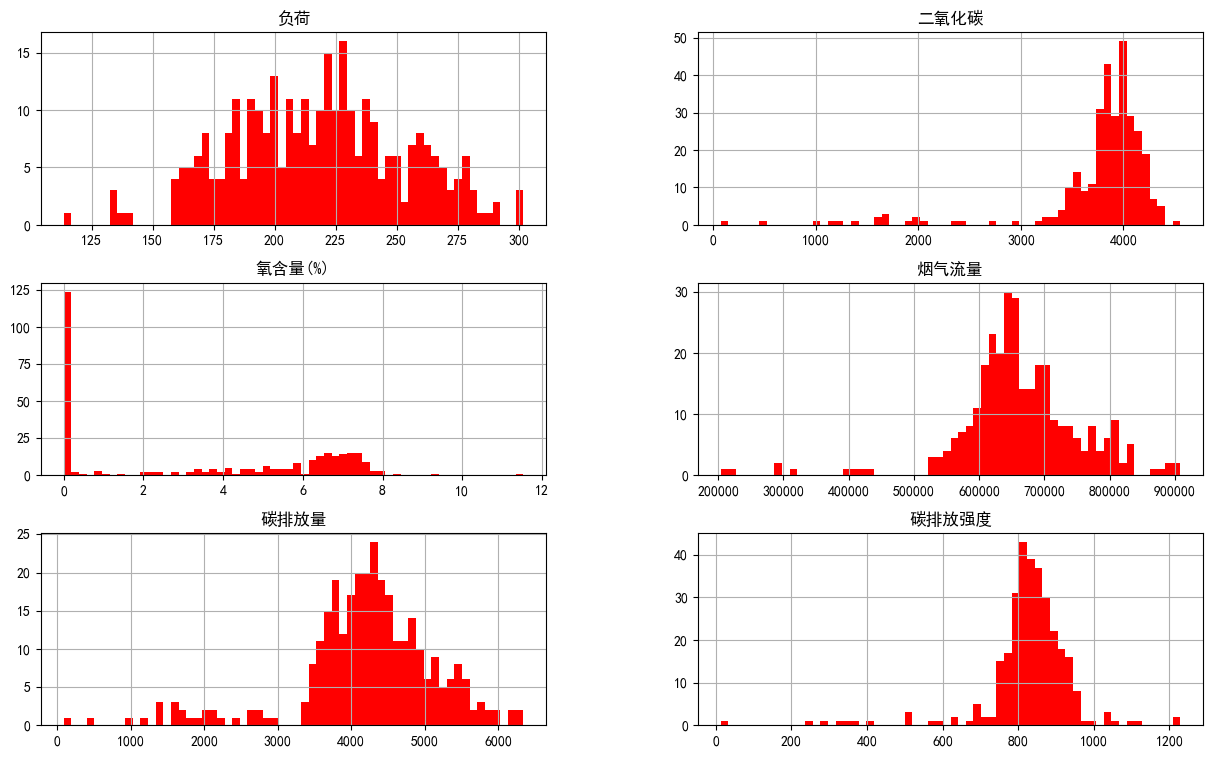

In [347]:
# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
cleaned.hist(bins=60, figsize=(15,9),color="red");plt.show()

In [251]:
daily_data

,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
时间,,,,,,
2023-01-03,141.088,1018.340,0.000,649903.593,1144.490,1062.950
2023-01-04,206.726,3601.180,0.052,693832.806,4176.630,838.918
2023-01-05,230.601,3922.270,0.000,727300.096,4807.570,863.165
2023-01-06,171.071,3542.230,0.030,626377.362,3713.790,902.416
2023-01-07,164.837,3548.370,0.000,608124.562,3602.720,896.849
...,...,...,...,...,...,...
2023-12-27,201.248,3893.450,7.625,668291.378,4386.120,912.860
2023-12-28,232.979,4105.450,7.037,710311.167,4908.670,872.530
2023-12-29,275.471,4314.200,6.160,773871.840,5626.730,853.124


In [253]:
daily_data.to_excel("神皖安庆一号.xlsx")

In [348]:
cleaned.to_excel("神皖安庆一号清洗.xlsx")

In [8]:
import pandas as pd
import os
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

def merge_emission_data(directory):
    """
    合并指定目录中的所有Excel文件，并按日汇总负荷、二氧化碳、氧含量、烟气流量和碳排放量。
    
    参数：
    directory (str): 包含Excel文件的目录路径
    
    返回：
    pd.DataFrame: 合并后的数据框，按日汇总
    """
    # List to hold each DataFrame
    dataframes = []

    # Loop through all files in the directory
    for file in os.listdir(directory):
        if file.endswith('.xlsx'):
            # Construct full file path
            file_path = os.path.join(directory, file)
            
            # Read the Excel file into a DataFrame
            df = pd.read_excel(file_path, skiprows=1)
            
            # Append the DataFrame to the list
            dataframes.append(df)

    # Concatenate all DataFrames into one DataFrame for the whole year
    year_df = pd.concat(dataframes, ignore_index=True)

    # Convert date from object type to datetime type
    year_df['时间'] = pd.to_datetime(year_df['时间'], errors='coerce')

    # Remove rows with invalid dates
    year_df = year_df.dropna(subset=['时间'])

    # Set date as index
    year_df.set_index('时间', inplace=True)

    # Resample to daily data
    daily_data = year_df.resample('D').agg({
        '负荷': 'mean',  # 计算每日平均负荷
        '二氧化碳': 'sum',  # 计算每日二氧化碳总和
        '氧含量(%)': 'mean',  # 计算每日平均氧含量
        '烟气流量': 'mean',  # 计算每日平均烟气流量
        '碳排放量': 'sum'  # 计算每日碳排放量总和
    })

    return daily_data




In [9]:
# 安庆剩余机组碳排放数据合并
directory2 = r'C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\重要-五电厂碳排放2023数据\神皖安庆二号机组'
directory3 = r'C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\重要-五电厂碳排放2023数据\神皖安庆三号机组'
directory4 = r'C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\重要-五电厂碳排放2023数据\神皖安庆四号机组'
merged_df2 = merge_emission_data(directory2)
merged_df3 = merge_emission_data(directory3)
merged_df4 = merge_emission_data(directory4)
print(merged_df4.head())

                    负荷     二氧化碳    氧含量(%)         烟气流量   碳排放量
时间                                                           
2023-01-01  700.013819  3658.89  0.000000  2102.292604  12.75
2023-01-02  772.629410  3749.28  0.039896  2241.022431  14.10
2023-01-03  880.620972  3875.57  0.037708  2459.372014  15.83
2023-01-04  797.733472  3805.53  0.029514  2297.662917  14.70
2023-01-05  891.729132  4051.45  0.000000  2474.724896  16.90


In [11]:
print(merged_df2.head())

                    负荷     二氧化碳    氧含量(%)           烟气流量     碳排放量
时间                                                               
2023-01-01  154.140174  3714.71  0.000000  604639.899757  3741.51
2023-01-02  159.770799  3780.31  0.000000  595487.742118  3749.47
2023-01-03  208.480104  4145.15  0.000000  672022.549236  4651.58
2023-01-04  203.342292  4040.52  0.030104  670346.788611  4556.76
2023-01-05  235.206736  4206.09  0.044132  724803.635521  5135.21


In [4]:
merged_df2.to_excel("神皖安庆二号机组23年.xlsx")
merged_df3.to_excel("神皖安庆三号机组23年.xlsx")
merged_df4.to_excel("神皖安庆四号机组23年.xlsx")